# This notebook will generate the graph representing the urban environment considered in EXE-USEPE-003: Urban Surveillance

In [1]:
"""
We define a default path where the modules developed in USEPE are stored
"""

default_path = r"/home/oda/ws/bluesky"

"""
We define a second default path where the scenarios are stored
"""

default_path2 = r"/home/oda/ws/scenarios/scenario/USEPE/exercise_3"


In [2]:
import os
import configparser
import pickle
import osmnx as ox
import pandas as pd

os.chdir(default_path)
from usepe.city_model.city_graph import cityGraph
from usepe.city_model.corridors_implementation import corridorLoad
from usepe.city_model.dynamic_segments import dynamicSegments
from usepe.city_model.multi_di_graph_3D import MultiDiGrpah3D
from usepe.city_model.utils import read_my_graphml

# Configuration file
We create a config file with the following fields:

[City]

mode = rectangle

hannover_lat = 52.376

hannover_lon = 9.76

zone_size = 1000

hannover_lat_min = 52.412274

hannover_lat_max = 52.466148

hannover_lon_min = 9.638119

hannover_lon_max = 9.745655

import = False

imported_graph_path = data/exe_3_ref.graphml

[Layers]

number_of_layers = 9

layer_width = 25

[Corridors]

corridors = 

altitude = 250

delta_z = 25

speed = 50

acceleration_length = 50

file_path_corridors = usepe/city_model/data/usepe-hannover-corridors.geojson

[Segments]

import = True

path = data/reference_segments.pkl

[BuildingData]

lat_min = 52.412274

lat_max = 52.466148

lon_min = 9.638119

lon_max = 9.745655

divisions = 20

directory_hannover = /home/oda/ws/bluesky/usepe/city_model/data/hannover_building_data

[Options]

one_way = False

simplify = True

simplification_distance = 0

simplification_error = 2

[Outputs]

graph_path = data/exe_3_ref.graphml

[Strategic_Deconfliction]

ratio = 3

delay = 60


In [3]:
# -------------- 1. CONFIGURATION FILE -----------------
"""
This section reads the configuration file.
Change the config_path to read the desired file
"""
# CONFIG
config_path = default_path2 + r"/settings_exe_3_ref.cfg"
config = configparser.ConfigParser()
config.read( config_path )

['/home/oda/ws/scenarios/scenario/USEPE/exercise_3/settings_exe_3_ref.cfg']

# City Graph

Obtaining the graph from OSM...


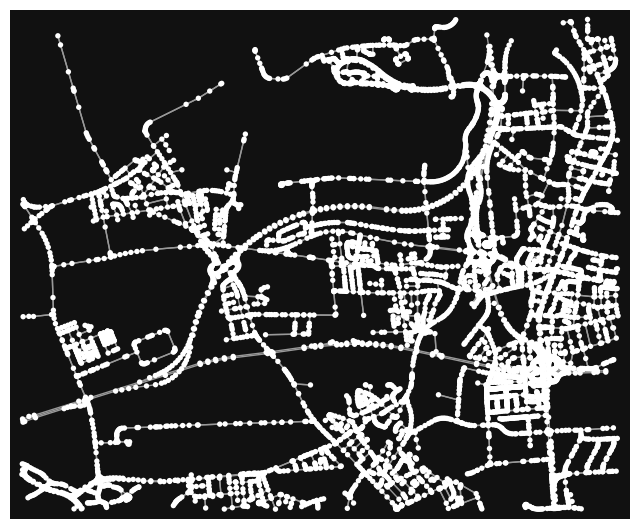

Simplifying the graph...
Removing nodes from the straight lines...
Reading the building data...
Calculating centroids...
Assigning altitude to sectors...
Creating diagonal edges...


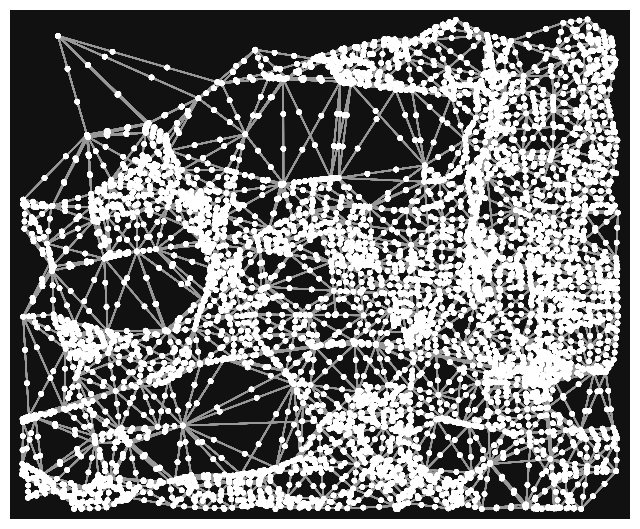

Saving the graph...


In [4]:
# -------------- 2. CITY GRAPH -------------------------
"""
This section creates a city graph or loads the graph defined in the 'City' section of the
configuration file.
"""
# City
os.chdir(default_path2)
if config['City'].getboolean( 'import' ):
    filepath = config['City']['imported_graph_path']
    G = read_my_graphml( filepath )
    G = MultiDiGrpah3D( G )
    # fig, ax = ox.plot_graph( G )
else:
    G = cityGraph( config )


# Segments

In [5]:
# -------------- 3. SEGMENTS ----------------------------
"""
This section creates an airspace segmentation or loads the segmentation defined in the 'Segments'
section of the configuration file.
Comment it to neglect the segmentation
"""
os.chdir(default_path)
if config['Segments'].getboolean( 'import' ):
    segments = pd.read_json(config['Segments']['imported_segments_file_path'], orient="records", lines=True )
else:
    segments = None

# Corridors

In [6]:
# -------------- 4. CORRIDORS ---------------------------
"""
This section loads the corridors defined in the 'Corridors' section of the configuration file
Comment it to neglect the creation of corridors
"""
G, segments = corridorLoad( G, segments, config )

Active corridors []


# Segment update

In [7]:
# ---------------- 5. Segment update --------------------
"""
Once we have loaded the segments and we created the corridors, we update the graph based on the parameters of the segments
"""
G, segments = dynamicSegments( G, config, segments, deleted_segments=None )

Updating segments...
No new segments
No new velocities
No geovectoring rules
Updating travel times...
Dynamic segments completed


# Saving graph

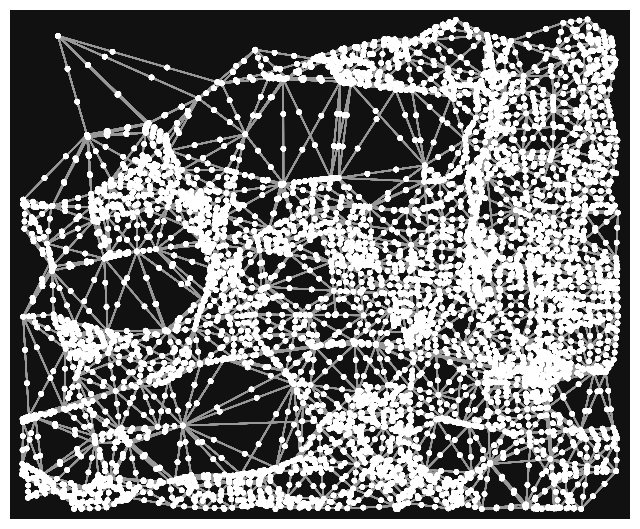

In [8]:
os.chdir(default_path2)
fig, ax = ox.plot_graph( G )
filepath = config['Outputs']['graph_path']
ox.save_graphml( G, filepath )